In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/0152192/Desktop/Orange Example/Colour Test.csv")

In [2]:
df.shape

(114947, 14)

In [3]:
# Blank records so created another dataset 

In [4]:
TestBackup = df.iloc[114883:,]

In [5]:
df = df.iloc[:114883,]

In [6]:
df.shape

(114883, 14)

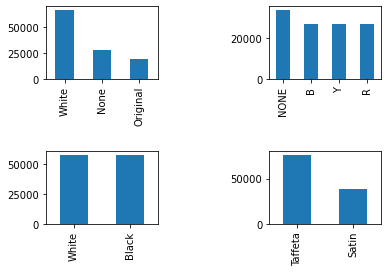

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(2, 2, 1)
df.BackingLayer2nd.value_counts().plot(kind='bar')

ax = fig.add_subplot(2, 2, 2)
df.PatternLayer3rd.value_counts().plot(kind='bar')

ax = fig.add_subplot(2, 2, 3)
df.WarpColor.value_counts().plot(kind='bar')

ax = fig.add_subplot(2, 2, 4)
df.WeavingMachine.value_counts().plot(kind='bar')

In [8]:
from sklearn.preprocessing import LabelEncoder
df[['BackingLayer2nd','PatternLayer3rd','WarpColor' ,'WeavingMachine',
   'Construction','WeftDenier','YarnCode','WeftYarnType']] = df[['BackingLayer2nd','PatternLayer3rd','WarpColor' ,'WeavingMachine',
                         'Construction','WeftDenier','YarnCode','WeftYarnType']].apply(LabelEncoder().fit_transform)


In [9]:
df.fillna(0,inplace= True)

In [10]:
df.head()

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,YarnCode,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,34.478,3.335,-12.089,5,2,1,1934,27.313,3.818,-10.501,2,7,1,0
1,30.657,3.465,-10.771,6,2,1,1934,27.313,3.818,-10.501,2,7,0,0
2,30.980,3.437,-10.747,6,2,1,1934,27.313,3.818,-10.501,2,7,1,0
3,29.781,3.538,-10.785,3,2,1,1934,27.313,3.818,-10.501,2,7,0,1
4,29.579,3.607,-10.847,3,2,1,1934,27.313,3.818,-10.501,2,7,1,1


In [11]:
df.head()

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,YarnCode,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,34.478,3.335,-12.089,5,2,1,1934,27.313,3.818,-10.501,2,7,1,0
1,30.657,3.465,-10.771,6,2,1,1934,27.313,3.818,-10.501,2,7,0,0
2,30.980,3.437,-10.747,6,2,1,1934,27.313,3.818,-10.501,2,7,1,0
3,29.781,3.538,-10.785,3,2,1,1934,27.313,3.818,-10.501,2,7,0,1
4,29.579,3.607,-10.847,3,2,1,1934,27.313,3.818,-10.501,2,7,1,1


In [12]:
df.shape

(114883, 14)

In [13]:
TRAIN = df.iloc[:110000,:]
TEST = df.iloc[110000:,:]

In [14]:
from xgboost import XGBRegressor 
model = XGBRegressor()
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [15]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler


X_train_l = TRAIN.drop(['L_weft','a_weft','b_weft'],axis=1)
y_train_l = TRAIN.L_weft
                        
X_test_l = TEST.drop(['L_weft','a_weft','b_weft'],axis=1)
y_test_l = TEST.L_weft

scaler = MinMaxScaler()

X_train_l  = scaler.fit_transform(X_train_l)
X_test_l  = scaler.transform(X_test_l)


target_scaler_l = MinMaxScaler()
y_train_l = np.log(y_train_l.values.reshape(-1, 1))
#y_test_l  = target_scaler_l.transform(y_test_l.values.reshape(-1, 1))

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_l,y_train_l)
Y_pred_l = rf.predict(X_test_l)

<ipython-input-16-6b235c2c115f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_l,y_train_l)


In [17]:
rmse = sqrt(mean_squared_error(y_test_l, np.expm1(Y_pred_l.reshape(-1, 1))))
mse = (mean_squared_error(y_test_l,  np.expm1(Y_pred_l.reshape(-1, 1))))
mae = mean_absolute_error(y_test_l,  np.expm1(Y_pred_l.reshape(-1, 1)))

print('RMSE value is ',rmse)
print('MSE value is ',mse)
print('MAE value is ',mae)

RMSE value is  2.564618988938763
MSE value is  6.577270558425284
MAE value is  1.7042414651503341


# Prediction of a_weft

In [25]:
X_train_a = TRAIN.drop(['a_weft','b_weft'],axis=1)
y_train_a = TRAIN.a_weft
                        
X_test_a = TEST.drop(['a_weft','b_weft'],axis=1)
y_test_a = TEST.a_weft
       

# Using L_weft prediction from previsous model


X_test_a['L_weft'] = np.expm1(Y_pred_l.reshape(-1, 1))


scaler = MinMaxScaler()

X_train_a  = scaler.fit_transform(X_train_a)
X_test_a  = scaler.transform(X_test_a)


target_scaler_a = MinMaxScaler()
y_train_a = target_scaler_a.fit_transform(y_train_a.values.reshape(-1, 1))


In [26]:
rf.fit(X_train_a,y_train_a)                   
Y_pred_a = rf.predict(X_test_a)
   
rmse = sqrt(mean_squared_error(y_test_a, target_scaler_a.inverse_transform(Y_pred_a.reshape(-1, 1))))
mse = (mean_squared_error(y_test_a, target_scaler_a.inverse_transform(Y_pred_a.reshape(-1, 1))))
mae = mean_absolute_error(y_test_a, target_scaler_a.inverse_transform(Y_pred_a.reshape(-1, 1)))

print('RMSE value is ',rmse)
print('MSE value is ',mse)
print('MAE value is ',mae)

<ipython-input-26-deec8e4f21f3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_a,y_train_a)


RMSE value is  3.3266728296504167
MSE value is  11.06675211553431
MAE value is  1.9118853061642416


# Prediction of b_weft

In [27]:
              
X_train_b = TRAIN.drop(['b_weft'],axis=1)
y_train_b = TRAIN.b_weft
                        
X_test_b= TEST.drop(['b_weft'],axis=1)
y_test_b = TEST.b_weft
       

# Using L_weft prediction from previsous model


X_test_b['L_weft'] = np.expm1(Y_pred_l.reshape(-1, 1))
X_test_b['a_weft'] = target_scaler_a.inverse_transform(Y_pred_a.reshape(-1, 1))

scaler = MinMaxScaler()

X_train_b  = scaler.fit_transform(X_train_b)
X_test_b  = scaler.transform(X_test_b)


target_scaler_b = MinMaxScaler()
y_train_b = target_scaler_b.fit_transform(y_train_b.values.reshape(-1, 1))



In [30]:
rf.fit(X_train_b,y_train_b)                   
Y_pred_b = rf.predict(X_test_b)
   
rmse = sqrt(mean_squared_error(y_test_b, target_scaler_b.inverse_transform(Y_pred_b.reshape(-1, 1))))
mse = (mean_squared_error(y_test_b, target_scaler_b.inverse_transform(Y_pred_b.reshape(-1, 1))))
mae = mean_absolute_error(y_test_b, target_scaler_b.inverse_transform(Y_pred_b.reshape(-1, 1)))

print('RMSE value is ',rmse)
print('MSE value is ',mse)
print('MAE value is ',mae)

<ipython-input-30-7213e4703292>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_b,y_train_b)


RMSE value is  3.1162050985558722
MSE value is  9.710734216265614
MAE value is  1.9215001044439886


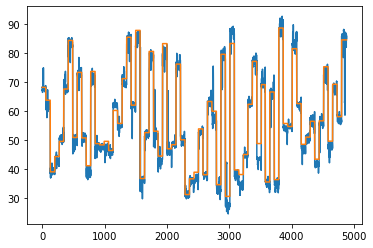

In [29]:
plt.plot(np.expm1(Y_pred_l.reshape(-1, 1)))
plt.plot(y_test_l.values)

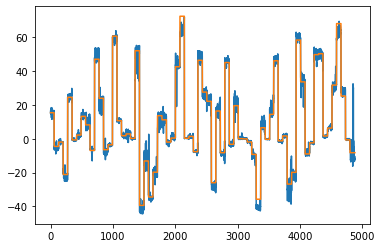

In [31]:
plt.plot(target_scaler_a.inverse_transform(Y_pred_a.reshape(-1, 1)))
plt.plot(y_test_a.values)

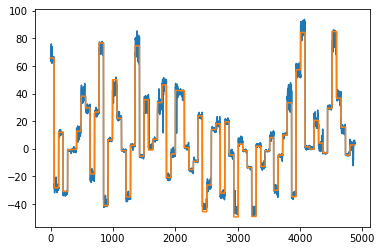

In [32]:
plt.plot(target_scaler_b.inverse_transform(Y_pred_b.reshape(-1, 1)))
plt.plot(y_test_b.values)

In [38]:
i

4882

In [39]:
np.square(y_test_l.values[i] - np.expm1(Y_pred_l[i].reshape(-1, 1)))

array([[1.29056653]])

In [40]:
import numpy as np

for i in range(len(y_test_l)):
    print((np.sqrt(
        (np.square(y_test_l.values[i] - np.expm1(Y_pred_l[i].reshape(-1, 1)))) + 
        
        (np.square(y_test_a.values[i] - target_scaler_a.inverse_transform(Y_pred_a[i].reshape(-1,1)))) +
        
        (np.square(y_test_b.values[i] - target_scaler_b.inverse_transform(Y_pred_b[i].reshape(-1,1))))
    
    )))

[[0.89989443]]
[[0.76528671]]
[[2.39576823]]
[[2.42452575]]
[[2.59149409]]
[[2.7512294]]
[[2.81395827]]
[[1.85289872]]
[[1.75293062]]
[[1.83613104]]
[[7.13147792]]
[[5.91841587]]
[[12.31570169]]
[[6.76534888]]
[[3.16711628]]
[[2.13545355]]
[[2.32842548]]
[[3.91420056]]
[[6.91397697]]
[[7.35423938]]
[[10.89649915]]
[[10.09680561]]
[[4.02505331]]
[[3.99347365]]
[[1.99898751]]
[[1.83591838]]
[[1.64617297]]
[[1.76943058]]
[[1.56306468]]
[[1.6182674]]
[[1.24390678]]
[[1.09123741]]
[[0.70253734]]
[[1.80273931]]
[[2.96067169]]
[[2.84078378]]
[[2.77314464]]
[[3.00581848]]
[[2.22073747]]
[[1.8160931]]
[[1.96170451]]
[[1.9227677]]
[[3.77179938]]
[[3.0857405]]
[[3.03194117]]
[[4.62740777]]
[[4.1552121]]
[[2.14145755]]
[[0.53809247]]
[[1.41993971]]
[[1.67427758]]
[[1.6889957]]
[[1.73890461]]
[[1.80800043]]
[[1.60766982]]
[[1.96767917]]
[[2.17497503]]
[[2.04205977]]
[[3.55932074]]
[[2.86577873]]
[[1.38389158]]
[[3.8774578]]
[[3.56158735]]
[[3.05394215]]
[[3.12806308]]
[[4.59838183]]
[[3.27792701]]


[[1.20810925]]
[[0.88111976]]
[[0.89289386]]
[[0.821315]]
[[0.78961404]]
[[3.486526]]
[[3.50962518]]
[[3.89260342]]
[[3.64333915]]
[[2.25759427]]
[[1.88786696]]
[[1.86187905]]
[[0.9081808]]
[[3.58725475]]
[[3.36409618]]
[[2.40564713]]
[[1.29801582]]
[[0.96544621]]
[[1.07702101]]
[[0.78385668]]
[[2.11406248]]
[[1.18967248]]
[[5.34720185]]
[[1.28766863]]
[[5.24021204]]
[[3.36869474]]
[[3.46726645]]
[[1.79460934]]
[[1.20108454]]
[[2.51266293]]
[[1.50741279]]
[[3.61164483]]
[[3.52102066]]
[[4.85915914]]
[[4.19792992]]
[[1.38590947]]
[[5.08789646]]
[[3.64067323]]
[[3.66380086]]
[[3.89599534]]
[[3.29508004]]
[[4.19691597]]
[[7.53071768]]
[[3.9963641]]
[[4.19960915]]
[[6.90044405]]
[[7.37848653]]
[[6.93506895]]
[[7.43631171]]
[[2.63440879]]
[[2.86480533]]
[[2.73122531]]
[[6.62610845]]
[[7.25486356]]
[[5.34654358]]
[[1.6354126]]
[[3.69756264]]
[[4.00422669]]
[[5.76496782]]
[[3.36836107]]
[[3.08328639]]
[[5.45944473]]
[[3.4948263]]
[[3.45423617]]
[[1.95584862]]
[[4.62525909]]
[[4.58413194]]
[[4

[[0.66197137]]
[[2.85572862]]
[[1.19212629]]
[[2.14691547]]
[[4.30784408]]
[[1.77415592]]
[[1.89267628]]
[[2.02491901]]
[[2.26802144]]
[[2.02063976]]
[[2.87599647]]
[[2.26658239]]
[[2.8064038]]
[[3.44000151]]
[[1.95428228]]
[[1.88660522]]
[[2.05850925]]
[[1.86461536]]
[[2.03396006]]
[[2.20230739]]
[[1.80016143]]
[[2.08136459]]
[[1.37329991]]
[[1.41069278]]
[[1.49436829]]
[[1.65509719]]
[[2.30091287]]
[[2.46878402]]
[[3.16279584]]
[[3.12639156]]
[[1.18645865]]
[[1.21851442]]
[[1.33319465]]
[[1.8695941]]
[[2.1223452]]
[[2.28657554]]
[[2.04531287]]
[[1.9556534]]
[[19.01437062]]
[[18.03576367]]
[[17.86746122]]
[[19.46341768]]
[[7.60374821]]
[[6.97079995]]
[[5.64447735]]
[[5.41014689]]
[[7.87890915]]
[[7.82172773]]
[[8.0342022]]
[[7.7306505]]
[[5.15661973]]
[[6.02723142]]
[[3.99399739]]
[[4.61557523]]
[[11.78910167]]
[[10.64154366]]
[[11.90274506]]
[[11.30678487]]
[[4.78442521]]
[[7.22692433]]
[[5.61702666]]
[[7.23696881]]
[[14.23123275]]
[[7.62299924]]
[[15.38383698]]
[[7.76696398]]
[[12.0

[[1.91903063]]
[[2.80582417]]
[[2.59726255]]
[[2.5036036]]
[[3.22406104]]
[[2.88864665]]
[[3.25296384]]
[[2.80320284]]
[[5.76830349]]
[[2.59761353]]
[[1.89134963]]
[[3.63727265]]
[[2.7296013]]
[[1.69500146]]
[[2.19605033]]
[[4.20799069]]
[[4.40154719]]
[[2.54703504]]
[[2.64143821]]
[[2.50539722]]
[[9.79598742]]
[[2.70477191]]
[[2.71865857]]
[[4.0664446]]
[[3.53624148]]
[[2.70909618]]
[[2.45862781]]
[[2.59781806]]
[[2.40824727]]
[[3.68595385]]
[[1.24737643]]
[[1.19928672]]
[[1.11859901]]
[[0.9484956]]
[[1.55818031]]
[[1.53852075]]
[[43.64562144]]
[[1.61826335]]
[[1.65097292]]
[[2.94659545]]
[[1.45999044]]
[[4.51409476]]
[[4.06081228]]
[[4.54508553]]
[[4.89653828]]
[[7.65971003]]
[[1.64261661]]
[[5.50818987]]
[[2.97477386]]
[[1.74957218]]
[[2.03547263]]
[[3.96996571]]
[[7.49771313]]
[[5.6153294]]
[[3.40787933]]
[[5.46471419]]
[[2.66850638]]
[[2.02852982]]
[[2.68817214]]
[[2.79313065]]
[[1.67087591]]
[[2.70605899]]
[[2.84925252]]
[[2.81948798]]
[[3.52922713]]
[[2.26409751]]
[[2.33669004]]

[[3.35073016]]
[[4.57255445]]
[[1.71322237]]
[[10.19354583]]
[[1.06535077]]
[[3.94383085]]
[[4.68675726]]
[[1.91672518]]
[[3.21634422]]
[[1.17686684]]
[[1.14615016]]
[[1.16397094]]
[[1.1875475]]
[[4.08582115]]
[[4.19661978]]
[[4.19425274]]
[[4.15480207]]
[[0.91755169]]
[[0.9781259]]
[[0.86340418]]
[[1.01959376]]
[[3.15978503]]
[[3.08730206]]
[[3.54117732]]
[[3.07541496]]
[[1.03043343]]
[[1.26566086]]
[[1.30524626]]
[[1.2725302]]
[[2.35830449]]
[[2.38022943]]
[[2.48297161]]
[[2.37631696]]
[[1.31025185]]
[[3.92874468]]
[[4.0279616]]
[[1.76887601]]
[[4.2035094]]
[[4.42244318]]
[[4.11567517]]
[[4.71648008]]
[[0.98602798]]
[[1.27355997]]
[[1.10210332]]
[[0.79836681]]
[[3.74090089]]
[[3.72182339]]
[[3.87037821]]
[[0.9597583]]
[[1.24221285]]
[[1.2401389]]
[[1.25795578]]
[[1.19319183]]
[[3.82768159]]
[[3.88089198]]
[[3.63377229]]
[[3.8591612]]
[[1.01408874]]
[[0.95285139]]
[[0.9630921]]
[[0.96506275]]
[[4.31721323]]
[[4.29206004]]
[[4.51738335]]
[[4.87762272]]
[[1.05107418]]
[[2.16902387]]
[[0

[[4.12277288]]
[[4.59409973]]
[[4.27714058]]
[[3.90204044]]
[[3.52861732]]
[[3.61883501]]
[[3.75410726]]
[[5.21712667]]
[[6.06702543]]
[[4.79018709]]
[[6.1346978]]
[[1.20169104]]
[[1.12200064]]
[[1.34832415]]
[[1.62217745]]
[[4.65851423]]
[[4.70571088]]
[[4.63379285]]
[[4.5237124]]
[[1.12987968]]
[[1.08610232]]
[[1.11356749]]
[[1.16081815]]
[[7.3326953]]
[[4.35140239]]
[[7.43767829]]
[[4.40517669]]
[[2.85803408]]
[[3.06424152]]
[[5.1020738]]
[[3.3452208]]
[[6.01271876]]
[[6.14908148]]
[[5.72835031]]
[[6.13233453]]
[[4.85305805]]
[[4.97777968]]
[[4.81313987]]
[[4.99321308]]
[[1.0819782]]
[[1.22788584]]
[[1.47946063]]
[[1.16661212]]
[[4.79540402]]
[[4.74712206]]
[[4.7755084]]
[[4.63946823]]
[[6.76671574]]
[[6.7195826]]
[[6.70299061]]
[[7.1654785]]
[[3.1850177]]
[[5.21329088]]
[[5.3714856]]
[[1.5019455]]
[[6.27719266]]
[[4.24304751]]
[[8.43263749]]
[[3.69834641]]
[[5.7656833]]
[[5.77983254]]
[[5.68346156]]
[[6.12865361]]
[[7.09082386]]
[[4.88063024]]
[[9.93272153]]
[[4.72528313]]
[[7.2832

[[6.72259421]]
[[3.85149296]]
[[7.89558019]]
[[5.36912341]]
[[5.10279431]]
[[9.38072459]]
[[11.24417664]]
[[11.62472332]]
[[11.66514859]]
[[11.45581659]]
[[6.27156339]]
[[7.97377015]]
[[15.23118798]]
[[13.38339093]]
[[12.46551623]]
[[13.93349209]]
[[11.81392739]]
[[11.81040491]]
[[7.2471097]]
[[15.01109052]]
[[3.22293664]]
[[15.75585464]]
[[7.03614606]]
[[7.96071691]]
[[13.12101746]]
[[13.65318624]]
[[5.12880497]]
[[16.98565898]]
[[3.54145858]]
[[9.90630199]]
[[2.04385122]]
[[1.76937542]]
[[1.77322943]]
[[2.00086102]]
[[5.19532365]]
[[5.18034933]]
[[5.23521073]]
[[5.21104069]]
[[3.06243827]]
[[3.08988325]]
[[4.14683502]]
[[3.42518875]]
[[3.27222738]]
[[2.84854007]]
[[3.04856713]]
[[3.22257683]]
[[2.64999345]]
[[3.0750285]]
[[3.20864781]]
[[3.71541832]]
[[2.33025087]]
[[2.2292427]]
[[3.61283217]]
[[2.83772018]]
[[3.15190934]]
[[3.14424895]]
[[3.15302154]]
[[3.16726704]]
[[5.31173669]]
[[5.1715102]]
[[5.33690041]]
[[5.36885093]]
[[2.69624046]]
[[2.60774645]]
[[2.6959159]]
[[2.75179845]]


[[7.90328406]]
[[7.64889004]]
[[7.39872037]]
[[7.09420309]]
[[7.8722703]]
[[7.28663962]]
[[4.58120326]]
[[5.16062875]]
[[5.46592258]]
[[6.76280589]]
[[2.49768148]]
[[7.5284289]]
[[7.13393309]]
[[7.5128852]]
[[7.47713519]]
[[9.26265581]]
[[10.91954886]]
[[6.22300095]]
[[9.84098684]]
[[3.29939446]]
[[6.33473644]]
[[5.4932758]]
[[6.21418073]]
[[8.48928059]]
[[6.11107298]]
[[6.95829253]]
[[6.85380122]]
[[8.44996326]]
[[7.95862462]]
[[8.53118402]]
[[7.49221176]]
[[7.40502149]]
[[5.40469678]]
[[2.34005422]]
[[4.39136855]]
[[1.78118505]]
[[2.0052453]]
[[2.33605086]]
[[2.27010351]]
[[3.3351421]]
[[4.55326388]]
[[7.51572846]]
[[7.90548118]]
[[5.68412875]]
[[7.20108183]]
[[6.69071461]]
[[6.29677722]]
[[7.29926481]]
[[6.30904989]]
[[5.4224339]]
[[5.85862564]]
[[3.88433601]]
[[1.79399981]]
[[2.60417625]]
[[1.96350811]]
[[8.87041589]]
[[7.07667411]]
[[2.47996643]]
[[3.04979552]]
[[5.01946019]]
[[5.08497388]]
[[6.02552169]]
[[4.04477991]]
[[6.76862986]]
[[7.43410004]]
[[7.20014858]]
[[7.10053762]]
[

In [41]:
np.mean(np.sqrt((np.square(y_test_l.values[i] - np.expm1(Y_pred_l[i].reshape(-1, 1))) + np.square(y_test_a.values[i] - target_scaler_a.inverse_transform(Y_pred_a[i].reshape(-1,1)))
+ np.square(y_test_b.values[i] - target_scaler_b.inverse_transform(Y_pred_b[i].reshape(-1,1))))))

4.480655514281681